<a href="https://colab.research.google.com/github/nandu26m/Python_Packages/blob/main/Pandas/Solving_real_world_data_science_tasks_with_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# Import libraries
import os
import regex as re
import pandas as pd

In [90]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### *Merging 12 months of sales data into a single file*

In [91]:
working_path = os.chdir("/content/drive/MyDrive/Study/Data_Projects/Solving_real_world_data_science_tasks_with_Python_Pandas/Sales_Data")

print(os.getcwd())

/content/drive/MyDrive/Study/Data_Projects/Solving_real_world_data_science_tasks_with_Python_Pandas/Sales_Data


In [92]:
files = [file for file in os.listdir()]

all_data = pd.DataFrame()

for file in files:
  df = pd.read_csv(file)
  all_data = pd.concat([all_data, df])

In [93]:
print(all_data)

      Order ID                 Product Quantity Ordered Price Each  \
0       259358  34in Ultrawide Monitor                1     379.99   
1       259359  27in 4K Gaming Monitor                1     389.99   
2       259360  AAA Batteries (4-pack)                2       2.99   
3       259361        27in FHD Monitor                1     149.99   
4       259362        Wired Headphones                1      11.99   
...        ...                     ...              ...        ...   
14366   236665        Wired Headphones                1      11.99   
14367   236666            20in Monitor                1     109.99   
14368   236667  AAA Batteries (4-pack)                1       2.99   
14369   236668        Wired Headphones                1      11.99   
14370   236669  AAA Batteries (4-pack)                1       2.99   

           Order Date                           Purchase Address  
0      10/28/19 10:56            609 Cherry St, Dallas, TX 75001  
1      10/28/19 17:26    

In [94]:
print(all_data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


## Clean up the data

Drop rows of 'NaN'

In [95]:
# To find the 'NaN' values present in the DataFrame
nan_df = all_data[all_data.isna().any(axis=1)]

# Drop rows with all the 'NaN' values
all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [96]:
# Find 'Or' and delete it
error_data = all_data[all_data['Order Date'].str[0:2] == 'Or']

# Replace the DataFrame to eliminate error
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [97]:
# Task 2: Add a month column

all_data["Month"] = pd.to_datetime(all_data["Order Date"]).dt.month
all_data.head()

/tmp/ipython-input-97-1197453830.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Month"] = pd.to_datetime(all_data["Order Date"]).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


In [98]:
# Adding one more column, 'Sales', to the DataFrame to analyze sales by month.

# Step 0: Make sure 'Quantity Ordered' is string type before using .str methods
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(str)

# Step 1: Drop rows with NaN in 'Quantity Ordered' or 'Price Each'
all_data = all_data.dropna(subset=['Quantity Ordered', 'Price Each'])

# Step 2: Keep only rows where 'Quantity Ordered' is all digits
all_data = all_data[all_data['Quantity Ordered'].str.isdigit()]

# Step 3: Convert to proper types
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

# Step 4: Calculate 'Sales'
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


### *Question 1: What was the best month for sales? How much was earned that month?*

In [99]:
results = all_data.groupby('Month').sum()

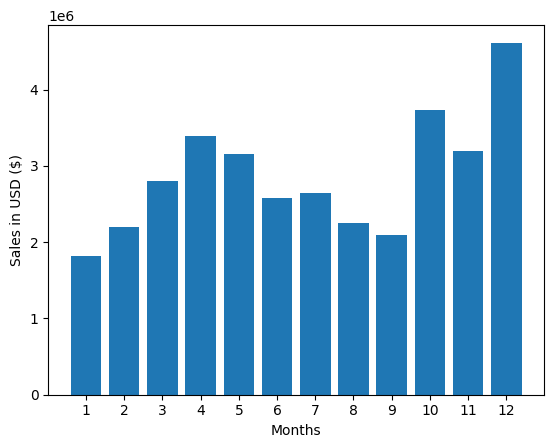

In [100]:
# Visualize the Sales data to get better understanding of the data

import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.show()

### Question 2: What city had the highest number of sales

In [101]:
import re

# Extract city from address
def get_city(address):
    return address.split(',')[1].strip()

# Extract state using regex
def get_state(address):
    match = re.search(r',\s*([A-Z]{2})\s*\d{5}', address)
    if match:
        return match.group(1)
    return None  # In case no match is found

# Create new column 'City' combining city and state
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas TX
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles CA
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City NY
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City NY
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles CA


In [102]:
highest_sales_by_month = all_data.groupby('City').sum(numeric_only=True)

# Get the full row (i.e., all columns) where 'Sales' is maximum
highest_sales_row = highest_sales_by_month.loc[highest_sales_by_month['Sales'].idxmax()]

print(highest_sales_row)

Quantity Ordered      50239.00
Price Each          8211461.74
Month                315520.00
Sales               8262203.91
Name: San Francisco CA, dtype: float64


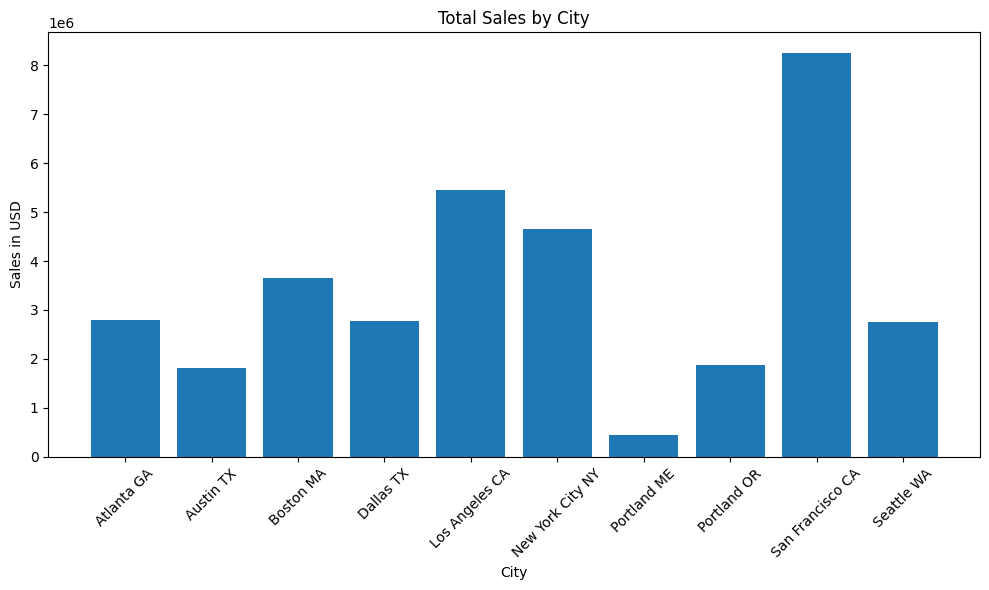

In [103]:
import matplotlib.pyplot as plt

# Group by City and sum the Sales
city_sales = all_data.groupby("City")["Sales"].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(city_sales.index, city_sales.values)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Sales in USD")
plt.title("Total Sales by City")
plt.tight_layout()
plt.show()

### *Question 3: What time should we display advertisments to maximize likelihood of customer's buying product*

In [104]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

/tmp/ipython-input-104-3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


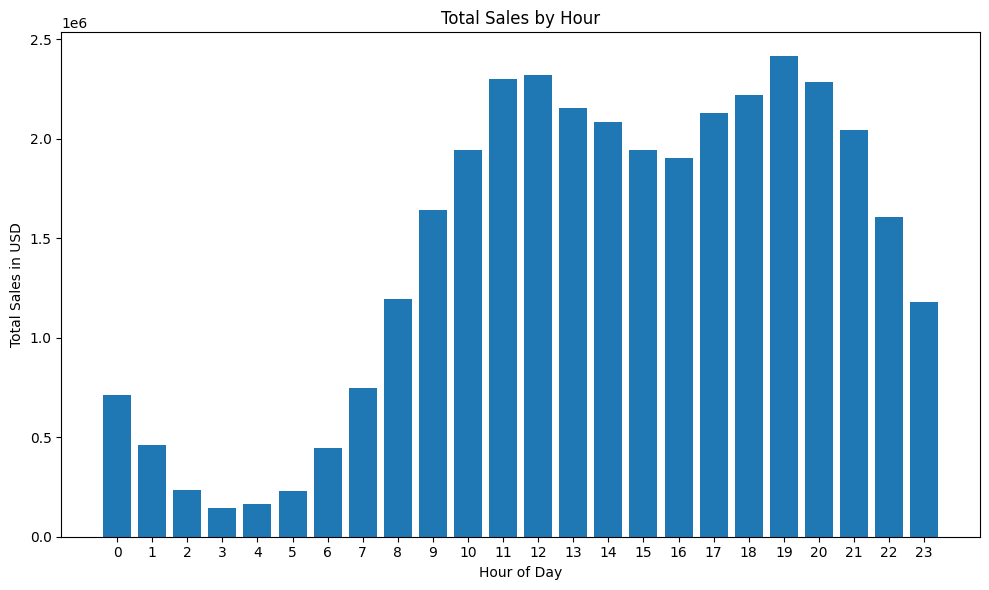

In [105]:
# Create a new column 'Hour'
all_data['Hour'] = all_data['Order Date'].dt.hour

# Group by Hour and sum Sales
hourly_sales = all_data.groupby('Hour')['Sales'].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(hourly_sales.index, hourly_sales.values)
plt.xticks(hourly_sales.index)  # Use actual hour values for ticks
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales in USD')
plt.title('Total Sales by Hour')
plt.tight_layout()
plt.show()

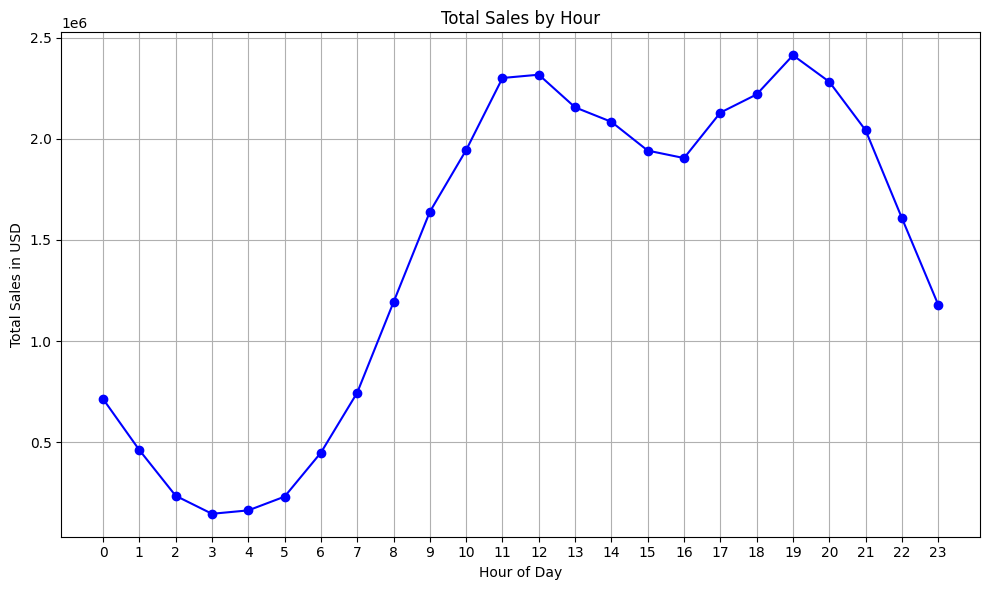

In [106]:
# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', color='blue')
plt.xticks(hourly_sales.index)  # Show every hour
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales in USD')
plt.title('Total Sales by Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

###*Question 4: What products are most often sold together*

In [107]:
# To find the products that are sold together filter the repeated "Order ID"
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
62,259420,Google Phone,1,600.00,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,600.00,Los Angeles CA,8
63,259420,USB-C Charging Cable,2,11.95,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,23.90,Los Angeles CA,8
65,259422,Google Phone,1,600.00,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,600.00,San Francisco CA,4
66,259422,USB-C Charging Cable,1,11.95,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,11.95,San Francisco CA,4
82,259438,iPhone,1,700.00,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,700.00,Los Angeles CA,9


In [108]:
 # Group all "Products" with the same "Order ID" in a single row

# Step 1: Filter duplicate Order IDs (products bought together)
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()

# Step 2: Group all products into a single row by Order ID
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Step 3: Drop duplicates to get one row per Order ID
df = df[['Order ID', 'Grouped']].drop_duplicates()

df

,Order ID,Grouped
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"
...,...,...
14271,236576,"Google Phone,USB-C Charging Cable"
14298,236602,"Lightning Charging Cable,iPhone"
14313,236616,"Google Phone,USB-C Charging Cable"
14341,236642,"Wired Headphones,Macbook Pro Laptop"


In [109]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = [item.strip() for item in row.split(',')]
    count.update(Counter(combinations(row_list, 2)))

# Show the 10 most common product pairs
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### *Question 5: What product sold the most? Why do you think it sold the most*

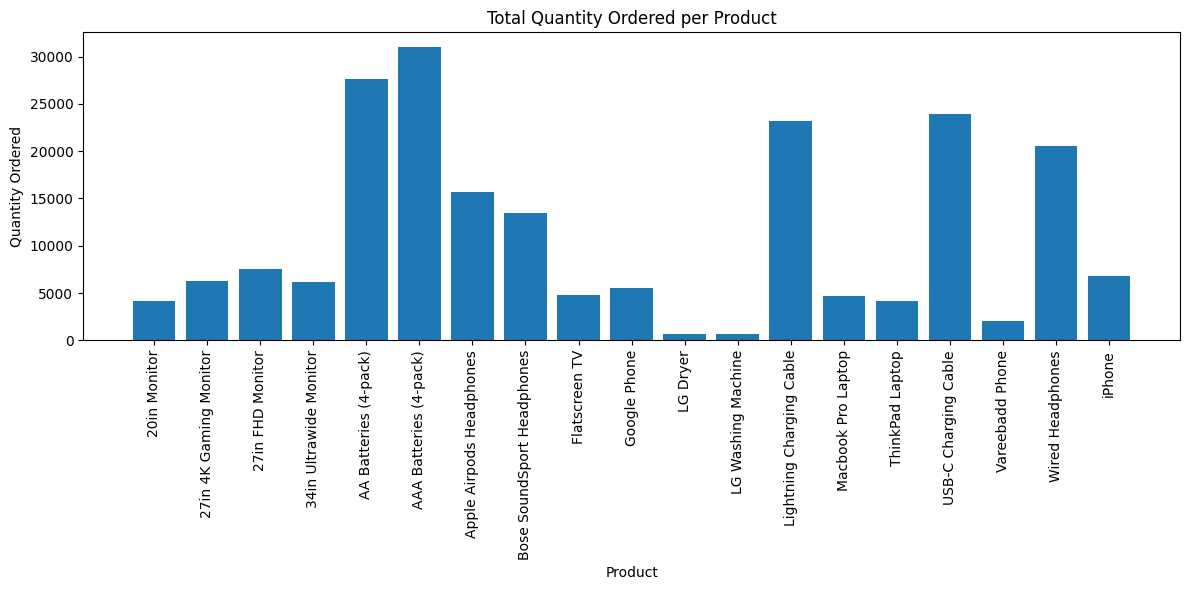

In [110]:
import matplotlib.pyplot as plt

# Group by Product and sum Quantity Ordered
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(quantity_ordered.index, quantity_ordered.values)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Total Quantity Ordered per Product')
plt.tight_layout()
plt.show()

/tmp/ipython-input-111-3683705676.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation=90)


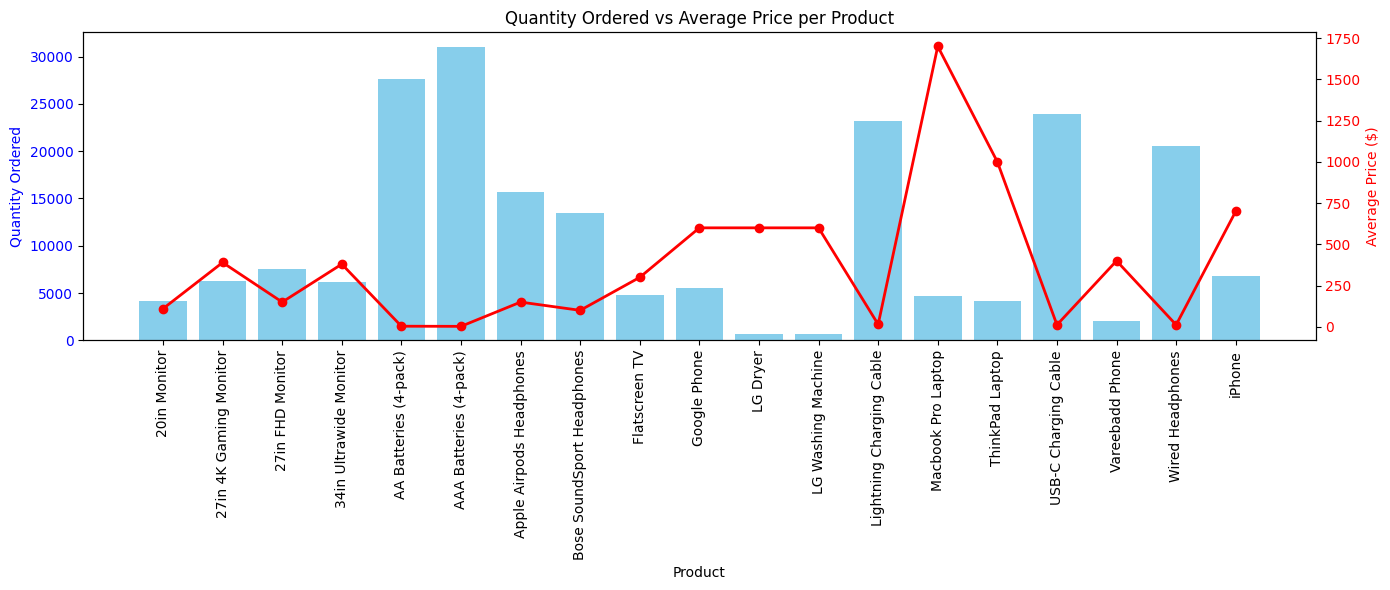

In [111]:
import matplotlib.pyplot as plt

# Ensure products are sorted the same in both Series
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product').mean(numeric_only=True)['Price Each']

# Align both by product name
products = quantity_ordered.index
y1 = quantity_ordered.values
y2 = prices.loc[products].values

# Plot
fig, ax1 = plt.subplots(figsize=(14,6))

# Bar chart: Quantity Ordered
ax1.bar(products, y1, color='skyblue')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(products, rotation=90)

# Line chart: Price Each
ax2 = ax1.twinx()
ax2.plot(products, y2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Average Price ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Quantity Ordered vs Average Price per Product')
plt.tight_layout()
plt.show()
